## Reference: https://medium.com/predict/dimensionality-reduction-using-python-principal-component-analysis-fb365f39ae5c

In [1]:
#let us start by importing the relevant libraries
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd

dataB_df = pd.read_csv('Meter B.csv',header=None)
dataB_df.columns = [
'ProfileFactor', 
'Symmetry', 
'Crossflow', 
'SwirlAngle', 
'FlowVelocityP1', 
'FlowVelocityP2',
'FlowVelocityP3',
'FlowVelocityP4', 
'AvgFlowVelocity', 
'SoundSpeedP1', 
'SoundSpeedP2', 
'SoundSpeedP3', 
'SoundSpeedP4', 
'AvgSoundSpeed', 
'SignalStrengthP1_1', 
'SignalStrengthP1_2', 
'SignalStrengthP2_1', 
'SignalStrengthP2_2',
'SignalStrengthP3_1',
'SignalStrengthP3_2',
'SignalStrengthP4_1',
'SignalStrengthP4_2',
'TurbulenceP1',
'TurbulenceP2',
'TurbulenceP3',
'TurbulenceP4',
'MeterPerformance',
'SignalQualityP1_1',
'SignalQualityP1_2',
'SignalQualityP2_1',
'SignalQualityP2_2',
'SignalQualityP3_1',
'SignalQualityP3_2', 
'SignalQualityP4_1',
'SignalQualityP4_2',
'GainP1_1', 
'GainP1_2', 
'GainP2_1', 
'GainP2_2', 
'GainP3_1', 
'GainP3_2', 
'GainP4_1', 
'GainP4_2', 
'TransmitTimeP1_1', 
'TransmitTimeP1_2', 
'TransmitTimeP2_1', 
'TransmitTimeP2_2', 
'TransmitTimeP3_1', 
'TransmitTimeP3_2', 
'TransmitTimeP4_1', 
'TransmitTimeP4_2', 
'HealthState']

dataB_df

ProfileFactor  Symmetry  Crossflow  SwirlAngle  FlowVelocityP1  \
0        1.185089  1.028128   1.016478      0.1500        2.195744   
1        1.191806  1.033750   1.019411      0.2170        2.192467   
2        1.181983  1.028089   1.020994      0.0889        3.246672   
3        1.182761  1.028783   1.021072      0.1170        3.244489   
4        1.182272  1.028922   1.021350      0.0222        3.245944   
..            ...       ...        ...         ...             ...   
87       2.418111  0.000000   0.000000      0.0000        5.332300   
88       3.290425  0.000000   0.000000      0.0000        5.420572   
89       2.601044  0.000000   0.000000      0.0000        5.256956   
90       2.336800  0.000000   0.000000      0.0000        5.222706   
91      -0.909168  0.000000   0.000000      0.0000        4.341200   

    FlowVelocityP2  FlowVelocityP3  FlowVelocityP4  AvgFlowVelocity  \
0         2.540944        2.511961        2.087889         2.394439   
1         2.546594        2.516744        2.075706         2.396089   
2         3.738378        3.715217        3.079356         3.523517   
3         3.741861        3.718839        3.080400         3.525933   
4         3.742217        3.715456        3.080950         3.525128   
..             ...             ...             ...              ...   
87        6.662456        6.288444        0.000000         5.922272   
88        6.653589        6.309761        0.000000         5.924100   
89        6.672083        6.287644        0.000000         5.916767   
90        6.669056        6.288772        0.000000         5.895378   
91        7.222394        6.796672        0.000000         5.971333   

    SoundSpeedP1  ...   GainP4_2  TransmitTimeP1_1  TransmitTimeP1_2  \
0    1483.869833  ...  49.800000         84.107067         84.003098   
1    1483.747389  ...  49.800000         84.114116         84.009973   
2    1483.777056  ...  49.800000         84.137487         83.983336   
3    1483.847444  ...  49.800000         84.133493         83.979407   
4    1483.819056  ...  49.800000         84.135354         83.980807   
..           ...  ...        ...               ...               ...   
87   1550.598167  ...  96.462778         80.552229         80.323852   
88   1542.063444  ...  96.534444         80.101938         79.872679   
89   1550.688444  ...  96.653889         80.544970         80.321946   
90   1550.800889  ...  96.612778         80.538187         80.317351   
91   1542.708278  ...  95.082778         80.044620         79.863208   

    TransmitTimeP2_1  TransmitTimeP2_2  TransmitTimeP3_1  TransmitTimeP3_2  \
0         120.338783        120.144244        120.371772        120.179078   
1         120.349089        120.153889        120.381700        120.188800   
2         120.392450        120.106206        120.425422        120.140578   
3         120.387033        120.100444        120.419883        120.134933   
4         120.389361        120.102800        120.422050        120.137472   
..               ...               ...               ...               ...   
87        118.229294        117.738550        118.007206        117.542750   
88        118.229300        117.738861        118.005594        117.539489   
89        118.227667        117.736100        118.002017        117.538133   
90        118.223733        117.732389        117.997167        117.532778   
91        118.235406        117.703439        118.006928        117.505489   

    TransmitTimeP4_1  TransmitTimeP4_2  HealthState  
0          84.019053         83.919971            1  
1          84.025607         83.927260            1  
2          84.047809         83.901593            1  
3          84.043715         83.897597            1  
4          84.045346         83.898959            1  
..               ...               ...          ...  
87          0.000000          0.000000            3  
88          0.000000          0.000000            3  
89          0.000000  

In [56]:
# Drop all signalStrength as there is already signalQuality of throughput.

# dataB_aggregated_df = dataB_df.drop(['FlowVelocityP1', 'FlowVelocityP2', 'FlowVelocityP3', 'FlowVelocityP4',
#                     'SoundSpeedP1', 'SoundSpeedP2', 'SoundSpeedP3', 'SoundSpeedP4',
#                     'SignalStrengthP1_1', 'SignalStrengthP1_2', 'SignalStrengthP2_1', 'SignalStrengthP2_2', 'SignalStrengthP3_1', 'SignalStrengthP3_2', 'SignalStrengthP4_1', 'SignalStrengthP4_2',
#                     'TransmitTimeP1_1', 'TransmitTimeP1_2', 'TransmitTimeP2_1', 'TransmitTimeP2_2', 'TransmitTimeP3_1', 'TransmitTimeP3_2', 'TransmitTimeP4_1', 'TransmitTimeP4_2'], axis=1)
dataB_aggregated_df = dataB_df.drop(['FlowVelocityP1', 'FlowVelocityP2', 'FlowVelocityP3', 'FlowVelocityP4',
                    'SoundSpeedP1', 'SoundSpeedP2', 'SoundSpeedP3', 'SoundSpeedP4',
                    'SignalStrengthP1_1', 'SignalStrengthP1_2', 'SignalStrengthP2_1', 'SignalStrengthP2_2', 'SignalStrengthP3_1', 'SignalStrengthP3_2', 'SignalStrengthP4_1', 'SignalStrengthP4_2'], axis=1)
dataB_aggregated_df

ProfileFactor  Symmetry  Crossflow  SwirlAngle  AvgFlowVelocity  \
0        1.185089  1.028128   1.016478      0.1500         2.394439   
1        1.191806  1.033750   1.019411      0.2170         2.396089   
2        1.181983  1.028089   1.020994      0.0889         3.523517   
3        1.182761  1.028783   1.021072      0.1170         3.525933   
4        1.182272  1.028922   1.021350      0.0222         3.525128   
..            ...       ...        ...         ...              ...   
87       2.418111  0.000000   0.000000      0.0000         5.922272   
88       3.290425  0.000000   0.000000      0.0000         5.924100   
89       2.601044  0.000000   0.000000      0.0000         5.916767   
90       2.336800  0.000000   0.000000      0.0000         5.895378   
91      -0.909168  0.000000   0.000000      0.0000         5.971333   

    AvgSoundSpeed  TurbulenceP1  TurbulenceP2  TurbulenceP3  TurbulenceP4  \
0     1485.153222      9.038944      4.426833      4.504556      9.241222   
1     1485.030722      9.030167      4.284000      4.597500      9.166444   
2     1485.061111      9.780722      4.612000      4.544778     10.231167   
3     1485.131278      9.749389      4.835333      4.749278     10.945056   
4     1485.103278      9.602333      4.479889      4.716833      9.984056   
..            ...           ...           ...           ...           ...   
87    1527.452111     23.878667      5.989722      6.529556      0.000000   
88    1527.424278     24.409833      6.758722      6.662389      0.000000   
89    1527.512111     24.108056      5.833667      6.123833      0.000000   
90    1527.587444     23.605667      5.832222      6.386056      0.000000   
91    1527.773500     33.966000      6.418778      6.374222      0.000000   

    ...   GainP4_2  TransmitTimeP1_1  TransmitTimeP1_2  TransmitTimeP2_1  \
0   ...  49.800000         84.107067         84.003098        120.338783   
1   ...  49.800000         84.114116         84.009973        120.349089   
2   ...  49.800000         84.137487         83.983336        120.392450   
3   ...  49.800000         84.133493         83.979407        120.387033   
4   ...  49.800000         84.135354         83.980807        120.389361   
..  ...        ...               ...               ...               ...   
87  ...  96.462778         80.552229         80.323852        118.229294   
88  ...  96.534444         80.101938         79.872679        118.229300   
89  ...  96.653889         80.544970         80.321946        118.227667   
90  ...  96.612778         80.538187         80.317351        118.223733   
91  ...  95.082778         80.044620         79.863208        118.235406   

    TransmitTimeP2_2  TransmitTimeP3_1  TransmitTimeP3_2  TransmitTimeP4_1  \
0         120.144244        120.371772        120.179078         84.019053   
1         120.153889        120.381700        120.188800         84.025607   
2         120.106206        120.425422        120.140578         84.047809   
3         120.100444        120.419883        120.134933         84.043715   
4         120.102800        120.422050        120.137472         84.045346   
..               ...               ...               ...               ...   
87        117.738550        118.007206        117.542750          0.000000   
88        117.738861        118.005594        117.539489          0.000000   
89        117.736100        118.002017        117.538133          0.000000   
90        117.732389        117.997167        117.532778          0.000000   
91        117.703439        118.006928        117.505489          0.000000   

    TransmitTimeP4_2  HealthState  
0          83.919971            0  
1          83.927260            0  
2          83.901593            0  
3          83.897597            0  
4          83.898959            0  
..               ...          ...  
87          0.000000            2  
88          0.000000            2  
89          0.000000            2  
90          0.00

In [57]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
le = LabelEncoder()
columns = dataB_aggregated_df.columns
#Let's Label Encode our class variable:
print(columns)
dataB_aggregated_df['HealthState'] = le.fit_transform(dataB_df['HealthState'])
dataB_aggregated_df.shape

Index(['ProfileFactor', 'Symmetry', 'Crossflow', 'SwirlAngle',
       'AvgFlowVelocity', 'AvgSoundSpeed', 'TurbulenceP1', 'TurbulenceP2',
       'TurbulenceP3', 'TurbulenceP4', 'MeterPerformance', 'SignalQualityP1_1',
       'SignalQualityP1_2', 'SignalQualityP2_1', 'SignalQualityP2_2',
       'SignalQualityP3_1', 'SignalQualityP3_2', 'SignalQualityP4_1',
       'SignalQualityP4_2', 'GainP1_1', 'GainP1_2', 'GainP2_1', 'GainP2_2',
       'GainP3_1', 'GainP3_2', 'GainP4_1', 'GainP4_2', 'TransmitTimeP1_1',
       'TransmitTimeP1_2', 'TransmitTimeP2_1', 'TransmitTimeP2_2',
       'TransmitTimeP3_1', 'TransmitTimeP3_2', 'TransmitTimeP4_1',
       'TransmitTimeP4_2', 'HealthState'],
      dtype='object')


(92, 36)

In [58]:
dataB_aggregated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ProfileFactor       92 non-null     float64
 1   Symmetry            92 non-null     float64
 2   Crossflow           92 non-null     float64
 3   SwirlAngle          92 non-null     float64
 4   FlowVelocityP1      92 non-null     float64
 5   FlowVelocityP2      92 non-null     float64
 6   FlowVelocityP3      92 non-null     float64
 7   FlowVelocityP4      92 non-null     float64
 8   AvgFlowVelocity     92 non-null     float64
 9   SoundSpeedP1        92 non-null     float64
 10  SoundSpeedP2        92 non-null     float64
 11  SoundSpeedP3        92 non-null     float64
 12  SoundSpeedP4        92 non-null     float64
 13  AvgSoundSpeed       92 non-null     float64
 14  SignalStrengthP1_1  92 non-null     float64
 15  SignalStrengthP1_2  92 non-null     float64
 16  SignalStre

## Treating The Missing Value

In [72]:
from sklearn.impute import SimpleImputer
newdf = dataB_aggregated_df.copy()
X = newdf.iloc[:,0:53] #separting all numercial independent attribute
imputer = SimpleImputer(missing_values=np.nan, strategy='median', verbose=1)
#fill missing values with mean column values
transformed_values = imputer.fit_transform(X)
column = X.columns
print(column)
newdf = pd.DataFrame(transformed_values, columns = column )
newdf.describe()
# Let’s print vehdf data frame :
print("Original null value count:", dataB_aggregated_df.isnull().sum())
print("\n\nCount after we impiuted the NaN value: ", newdf.isnull().sum())

Index(['ProfileFactor', 'Symmetry', 'Crossflow', 'SwirlAngle',
       'AvgFlowVelocity', 'AvgSoundSpeed', 'TurbulenceP1', 'TurbulenceP2',
       'TurbulenceP3', 'TurbulenceP4', 'MeterPerformance', 'SignalQualityP1_1',
       'SignalQualityP1_2', 'SignalQualityP2_1', 'SignalQualityP2_2',
       'SignalQualityP3_1', 'SignalQualityP3_2', 'SignalQualityP4_1',
       'SignalQualityP4_2', 'GainP1_1', 'GainP1_2', 'GainP2_1', 'GainP2_2',
       'GainP3_1', 'GainP3_2', 'GainP4_1', 'GainP4_2', 'TransmitTimeP1_1',
       'TransmitTimeP1_2', 'TransmitTimeP2_1', 'TransmitTimeP2_2',
       'TransmitTimeP3_1', 'TransmitTimeP3_2', 'TransmitTimeP4_1',
       'TransmitTimeP4_2', 'HealthState'],
      dtype='object')
Original null value count: ProfileFactor        0
Symmetry             0
Crossflow            0
SwirlAngle           0
AvgFlowVelocity      0
AvgSoundSpeed        0
TurbulenceP1         0
TurbulenceP2         0
TurbulenceP3         0
TurbulenceP4         0
MeterPerformance     0
SignalQualit

## Descriptive Statistic

In [73]:
newdf.describe().T

count         mean        std          min          25%  \
ProfileFactor       92.0     1.550166   1.161946    -0.909168     1.182639   
Symmetry            92.0     0.829287   0.431154    -0.000233     0.824857   
Crossflow           92.0     0.814946   0.432390    -0.005494     0.784160   
SwirlAngle          92.0     0.690942   0.817834    -1.410000     0.022217   
AvgFlowVelocity     92.0     4.673391   1.900039     1.256283     3.225096   
AvgSoundSpeed       92.0  1498.977355  16.061652  1477.818667  1485.147736   
TurbulenceP1        92.0    21.412782  15.774110     2.777778    11.142556   
TurbulenceP2        92.0     8.115785   8.689077     4.284000     4.862403   
TurbulenceP3        92.0     6.634738   5.242401     3.924833     4.762458   
TurbulenceP4        92.0    14.444917  11.013342     0.000000     7.243944   
MeterPerformance    92.0    88.039384  15.152276    41.255556    77.513889   
SignalQualityP1_1   92.0    83.793231  23.662695     8.694444    64.955556   
SignalQualityP1_2   92.0    85.287504  22.525366     9.688889    74.340278   
SignalQualityP2_1   92.0    94.467262  12.459798    25.338889    91.831944   
SignalQualityP2_2   92.0    94.523965  12.221137    27.766667    91.831944   
SignalQualityP3_1   92.0    97.021003   8.560006    47.388889    99.706944   
SignalQualityP3_2   92.0    97.062730   8.428938    48.138889    99.748611   
SignalQualityP4_1   92.0    75.223512  35.048086     0.000000    74.562500   
SignalQualityP4_2   92.0    76.496998  35.037926     0.100000    79.555556   
GainP1_1            92.0    62.278374  14.106776    52.300000    52.500000   
GainP1_2            92.0    62.278374  14.106776    52.300000    52.500000   
GainP2_1            92.0    59.147585  10.451600    52.900000    52.900000   
GainP2_2            92.0    59.147585  10.451600    52.900000    52.900000   
GainP3_1            92.0    59.137268  11.633488    50.200000    50.700000   
GainP3_2            92.0    59.137268  11.633488    50.200000    50.700000   
GainP4_1            92.0    69.450176  18.448332    49.800000    49.800000   
GainP4_2            92.0    69.450176  18.448332    49.800000    49.800000   
TransmitTimeP1_1    92.0    78.603632  14.880508     2.337279    80.509385   
TransmitTimeP1_2    92.0    78.411524  14.841298     2.340476    80.317608   
TransmitTimeP2_1    92.0   118.026201  11.577071    20.124378   119.360682   
TransmitTimeP2_2    92.0   117.647109  11.542253    20.056861   119.087846   
TransmitTimeP3_1    92.0   119.273272   3.449410    91.382267   119.103836   
TransmitTimeP3_2    92.0   118.900991   3.458579    91.026656   118.700189   
TransmitTimeP4_1    92.0    68.747999  30.593764     0.000000    80.457636   
TransmitTimeP4_2    92.0    68.603348  30.530074     0.000000    80.280803   
HealthState         92.0     1.326087   0.799845     0.000000     1.000000   

                           50%          75%          max  
ProfileFactor         1.274308     1.372697    10.208497  
Symmetry              1.029114     1.097043     1.497856  
Crossflow             1.021306     1.053039     1.992583  
SwirlAngle            0.340000     1.722000     2.200000  
AvgFlowVelocity       5.295886     6.200565     8.250361  
AvgSoundSpeed      1501.125833  1505.716361  1527.773500  
TurbulenceP1         12.227222    27.388764    75.616444  
TurbulenceP2          5.107778     6.569403    63.862667  
TurbulenceP3          5.159722     6.377181    40.764667  
TurbulenceP4         12.651917    19.410764    61.361111  
MeterPerformance     95.627778    98.605556   100.000000  
SignalQualityP1_1   100.000000   100.000000   100.000000  
SignalQualityP1_2   100.000000   100.000000   100.000000  
SignalQualityP2_1   100.000000   100.000000   100.000000  
SignalQualityP2_2   100.000000   100.000000   100.000000  
SignalQualityP3_1   100.000000   100.000000   100.000000  
SignalQualityP3_2   100.000000   100.000000   100.000000  
SignalQualityP4_1    89.077778   100.000000   100.000000  
SignalQuali

 ## Plot our newdf using seaborn

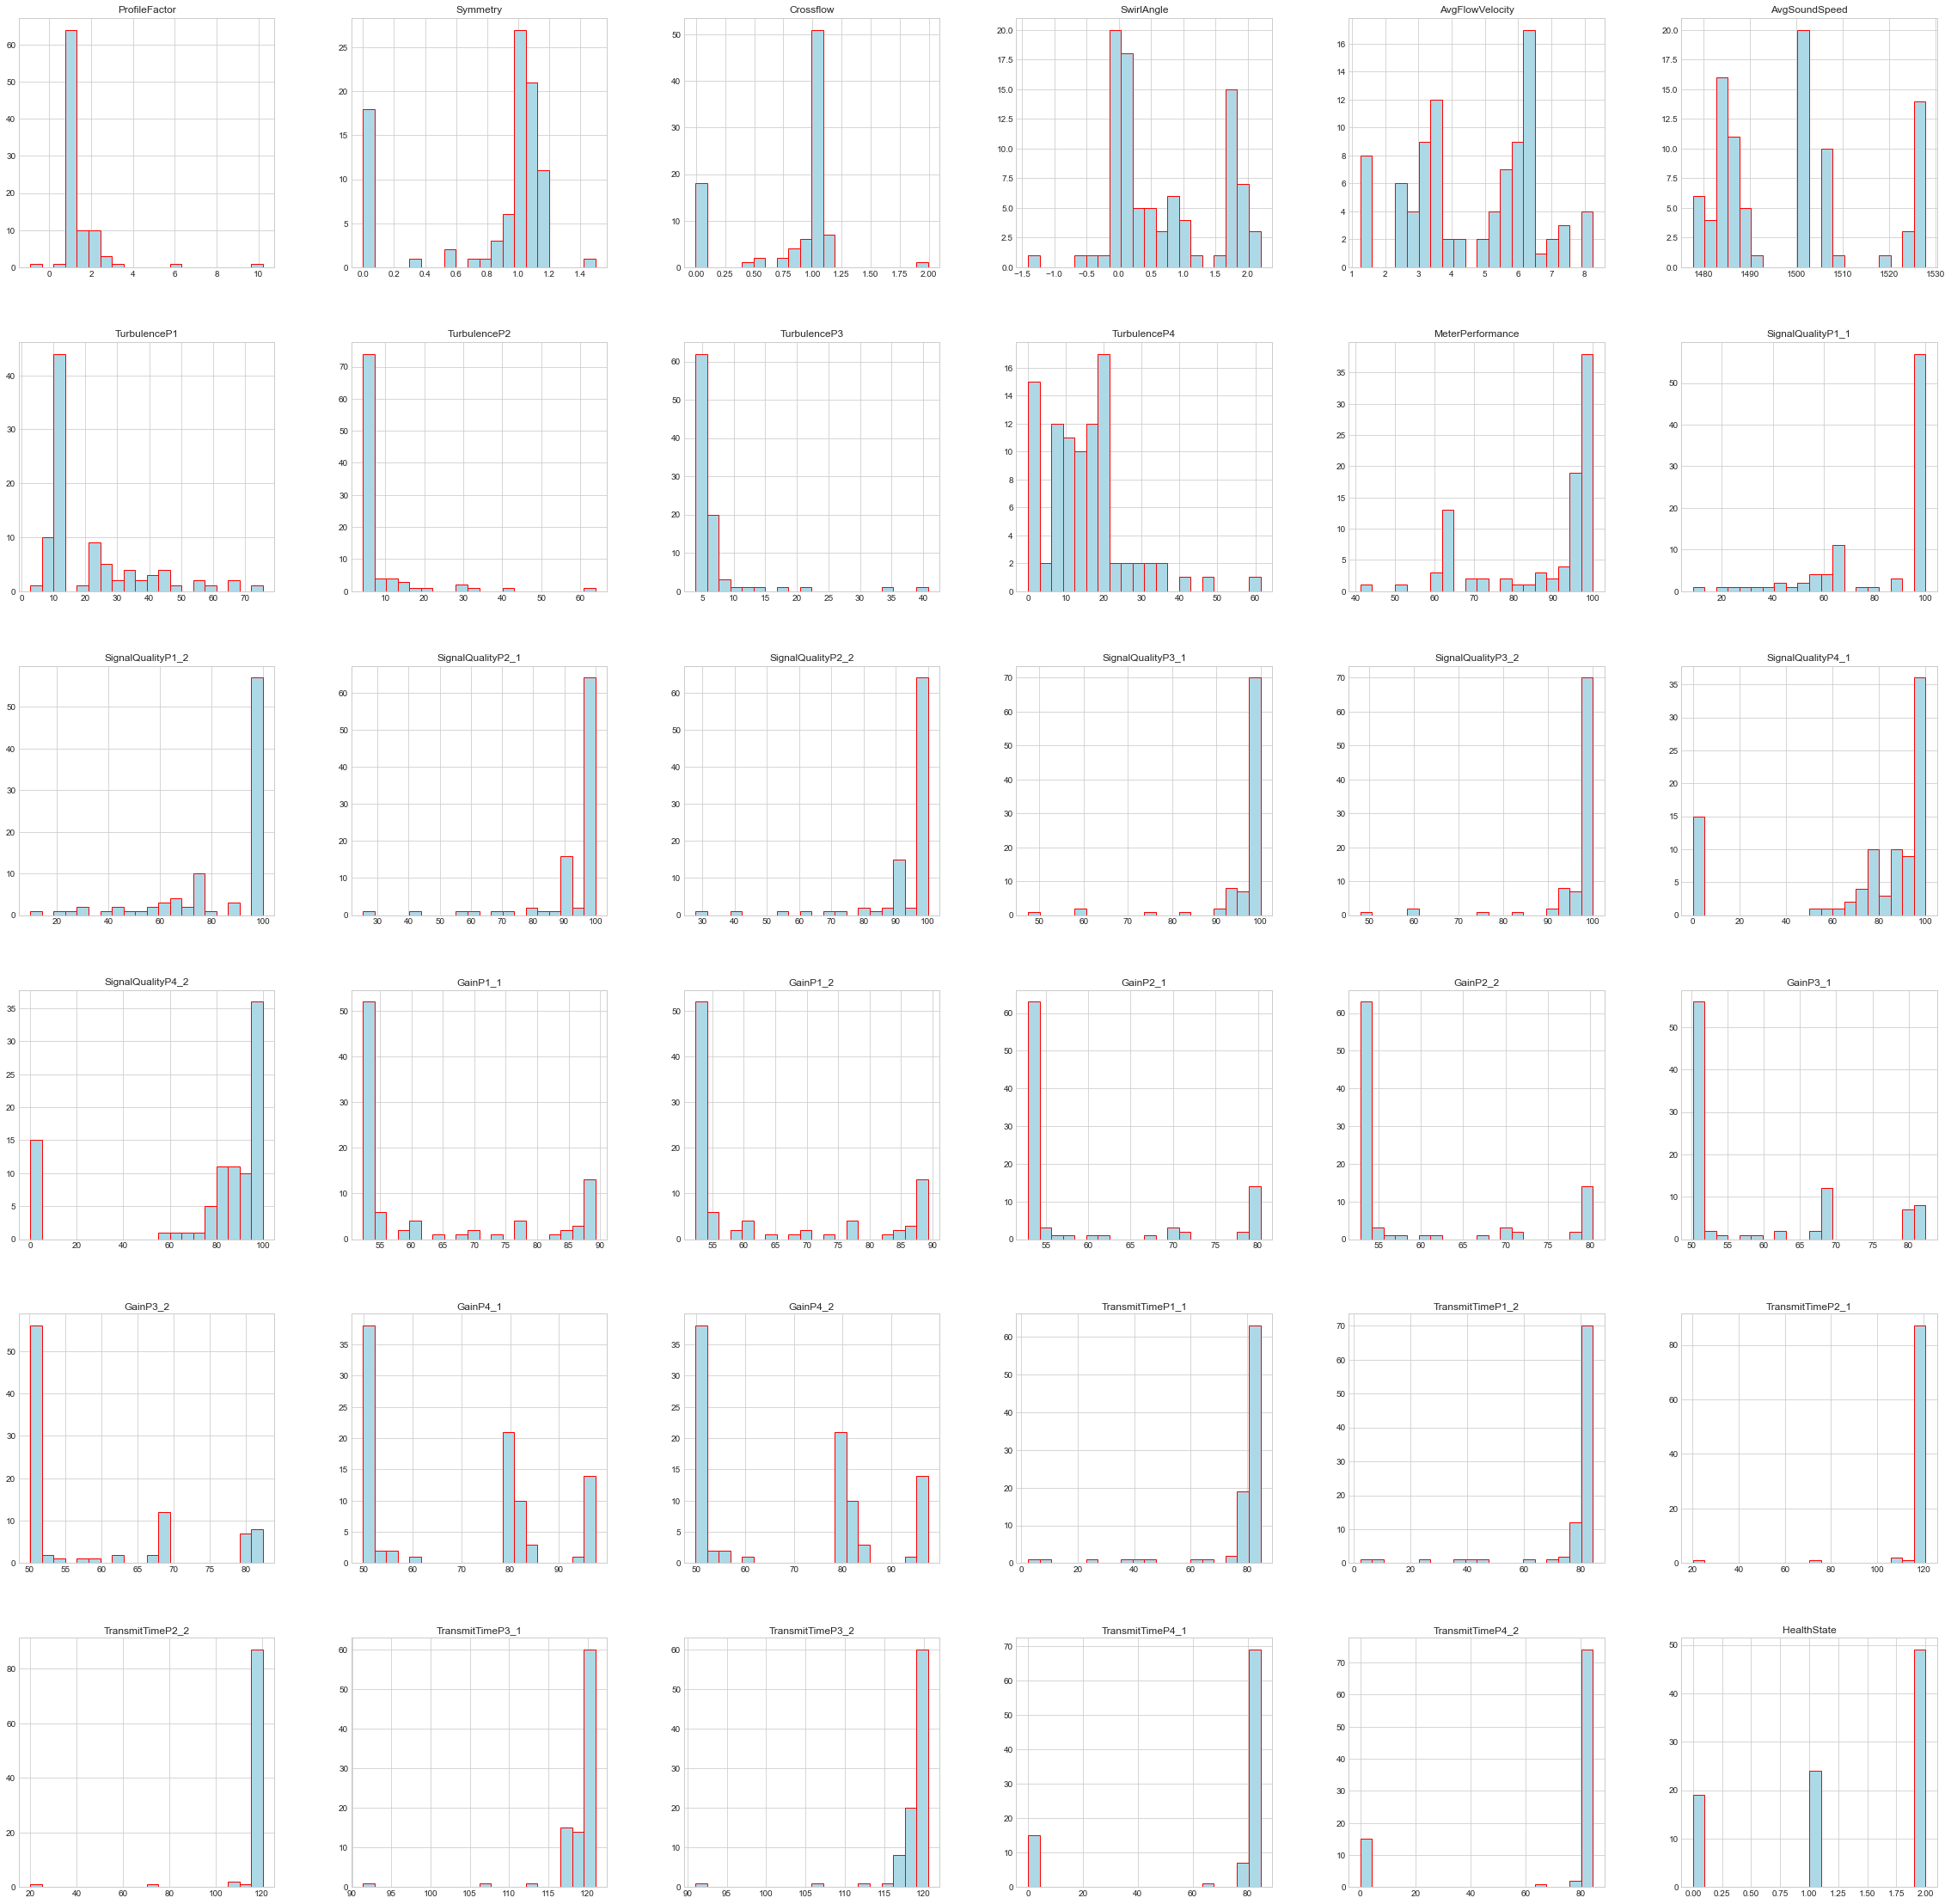

In [74]:
plt.style.use('seaborn-whitegrid')
newdf.hist(bins=20, figsize=(40,40), color='lightblue', edgecolor = 'red')
plt.show()

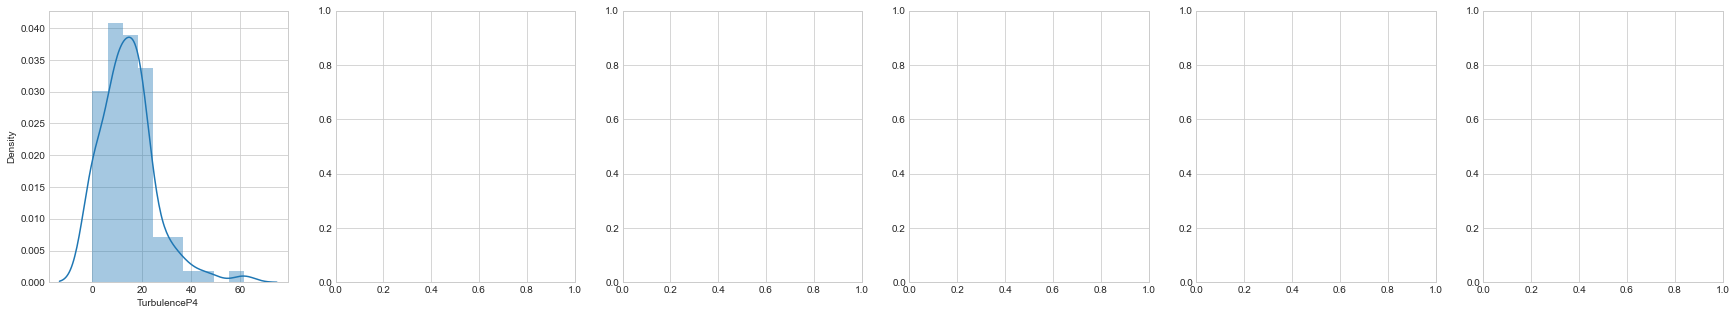

In [75]:
f, ax = plt.subplots(1, 6, figsize=(30,5))
vis1 = sns.distplot(newdf["TurbulenceP4"],bins=10, ax= ax[0])
# vis2 = sns.distplot(newdf["scaled_variance"],bins=10, ax=ax[1])
# vis3 = sns.distplot(newdf["skewness_about.1"],bins=10, ax= ax[2])
# vis4 = sns.distplot(newdf["skewness_about"],bins=10, ax=ax[3])
# vis6 = sns.distplot(newdf["scatter_ratio"],bins=10, ax=ax[5])
f.savefig('subplot.png')

In [76]:
skewValue = newdf.skew()
print("skewValue of dataframe attributes: ", skewValue)

skewValue of dataframe attributes:  ProfileFactor        5.315097
Symmetry            -1.248535
Crossflow           -1.020397
SwirlAngle           0.366872
AvgFlowVelocity     -0.134790
AvgSoundSpeed        0.629334
TurbulenceP1         1.519284
TurbulenceP2         4.269296
TurbulenceP3         4.933340
TurbulenceP4         1.279272
MeterPerformance    -1.164869
SignalQualityP1_1   -1.238857
SignalQualityP1_2   -1.510123
SignalQualityP2_1   -3.511498
SignalQualityP2_2   -3.443014
SignalQualityP3_1   -4.224885
SignalQualityP3_2   -4.241260
SignalQualityP4_1   -1.508421
SignalQualityP4_2   -1.604082
GainP1_1             1.029747
GainP1_2             1.029747
GainP2_1             1.328412
GainP2_2             1.328412
GainP3_1             1.014735
GainP3_2             1.014735
GainP4_1             0.131026
GainP4_2             0.131026
TransmitTimeP1_1    -3.803330
TransmitTimeP1_2    -3.805040
TransmitTimeP2_1    -7.478451
TransmitTimeP2_2    -7.474768
TransmitTimeP3_1    -6.465424
Tran

## Univariate Analysis Using Boxplot

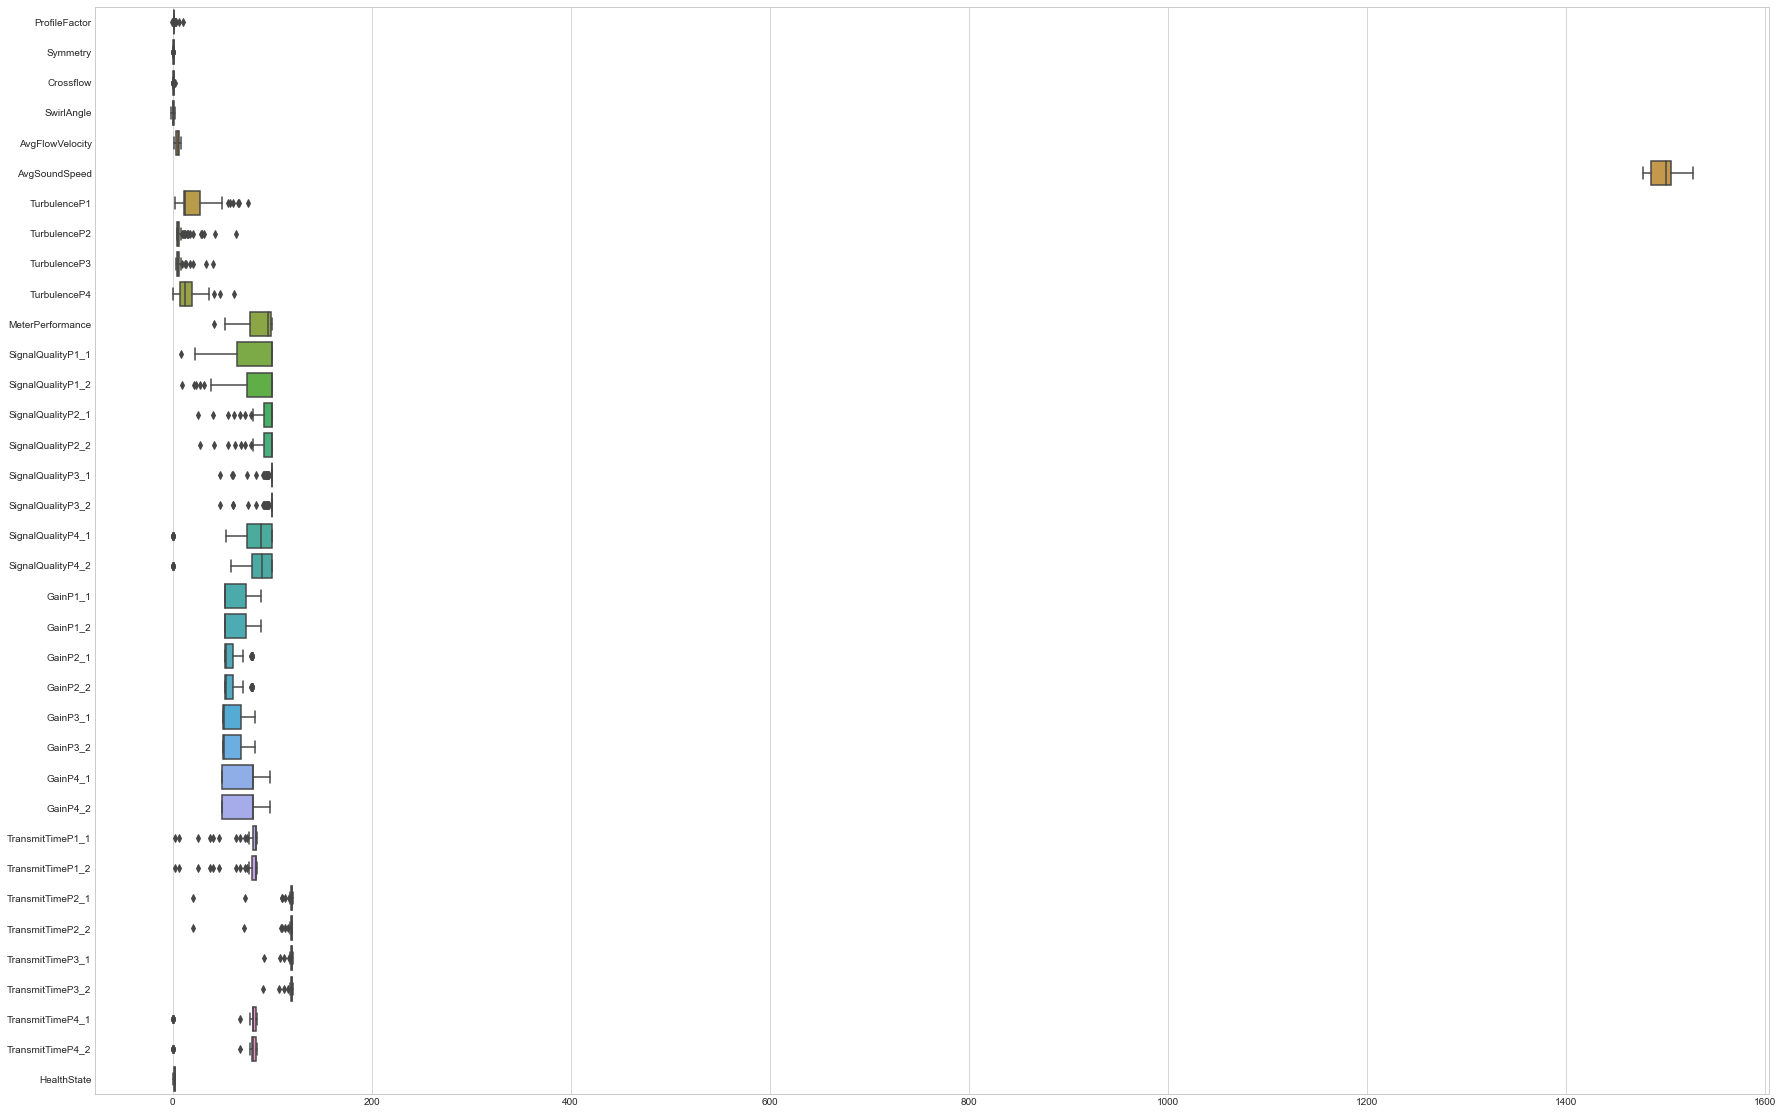

In [80]:
#Summary View of all attribute , The we will look into all the boxplot individually to trace out outliers
plt.subplots(figsize=(30,20))
ax = sns.boxplot(data=newdf, orient="h")

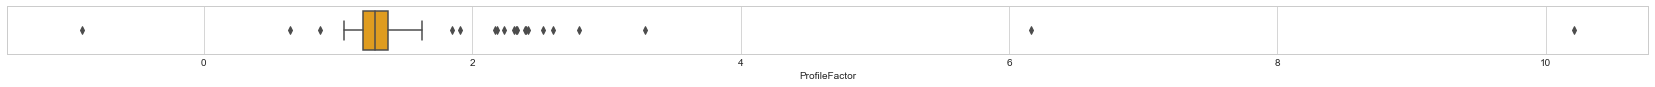

In [89]:
plt.figure(figsize= (100,3))
plt.subplot(3,3,3)
sns.boxplot(x= newdf.ProfileFactor, color='orange')
# plt.figure(figsize= (100,3))
# plt.subplot(3,3,3)
# sns.boxplot(x= newdf.Symmetry, color='orange')
# plt.figure(figsize= (100,3))
# plt.subplot(3,3,3)
# sns.boxplot(x= newdf.Crossflow, color='orange')
# plt.figure(figsize= (100,3))
# plt.subplot(3,3,3)
# sns.boxplot(x= newdf.SwirlAngle, color='orange')
# plt.figure(figsize= (100,3))
# plt.subplot(3,3,3)
# sns.boxplot(x= newdf.AvgFlowVelocity, color='orange')
# plt.figure(figsize= (100,3))
# plt.subplot(3,3,3)
# sns.boxplot(x= newdf.AvgSoundSpeed, color='orange')
# plt.figure(figsize= (100,3))
# plt.subplot(3,3,3)
# sns.boxplot(x= newdf.TurbulenceP1, color='orange')
# plt.figure(figsize= (100,3))
# plt.subplot(3,3,3)
# sns.boxplot(x= newdf.TurbulenceP2, color='orange')
# plt.figure(figsize= (100,3))
# plt.subplot(3,3,3)
# sns.boxplot(x= newdf.TurbulenceP3, color='orange')
# plt.figure(figsize= (100,3))
# plt.subplot(3,3,3)
# sns.boxplot(x= newdf.TurbulenceP4, color='orange')
plt.show()

## Treating Outliers Using IQR: Upper whisker

In [90]:
newdf.shape

(92, 36)

In [91]:
from scipy.stats import iqr
Q1 = newdf.quantile(0.25)
Q3 = newdf.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
cleandf = newdf[~((newdf < (Q1 - 1.5 * IQR)) |(newdf > (Q3 + 1.5 * IQR))).any(axis=1)]
cleandf.shape

ProfileFactor         0.190058
Symmetry              0.272186
Crossflow             0.268879
SwirlAngle            1.699783
AvgFlowVelocity       2.975469
AvgSoundSpeed        20.568625
TurbulenceP1         16.246208
TurbulenceP2          1.707000
TurbulenceP3          1.614722
TurbulenceP4         12.166819
MeterPerformance     21.091667
SignalQualityP1_1    35.044444
SignalQualityP1_2    25.659722
SignalQualityP2_1     8.168056
SignalQualityP2_2     8.168056
SignalQualityP3_1     0.293056
SignalQualityP3_2     0.251389
SignalQualityP4_1    25.437500
SignalQualityP4_2    20.444444
GainP1_1             21.739583
GainP1_2             21.739583
GainP2_1              8.103194
GainP2_2              8.103194
GainP3_1             17.800000
GainP3_2             17.800000
GainP4_1             31.175417
GainP4_2             31.175417
TransmitTimeP1_1      3.676593
TransmitTimeP1_2      3.641423
TransmitTimeP2_1      1.130265
TransmitTimeP2_2      1.010582
TransmitTimeP3_1      1.402500
Transmit

(58, 36)

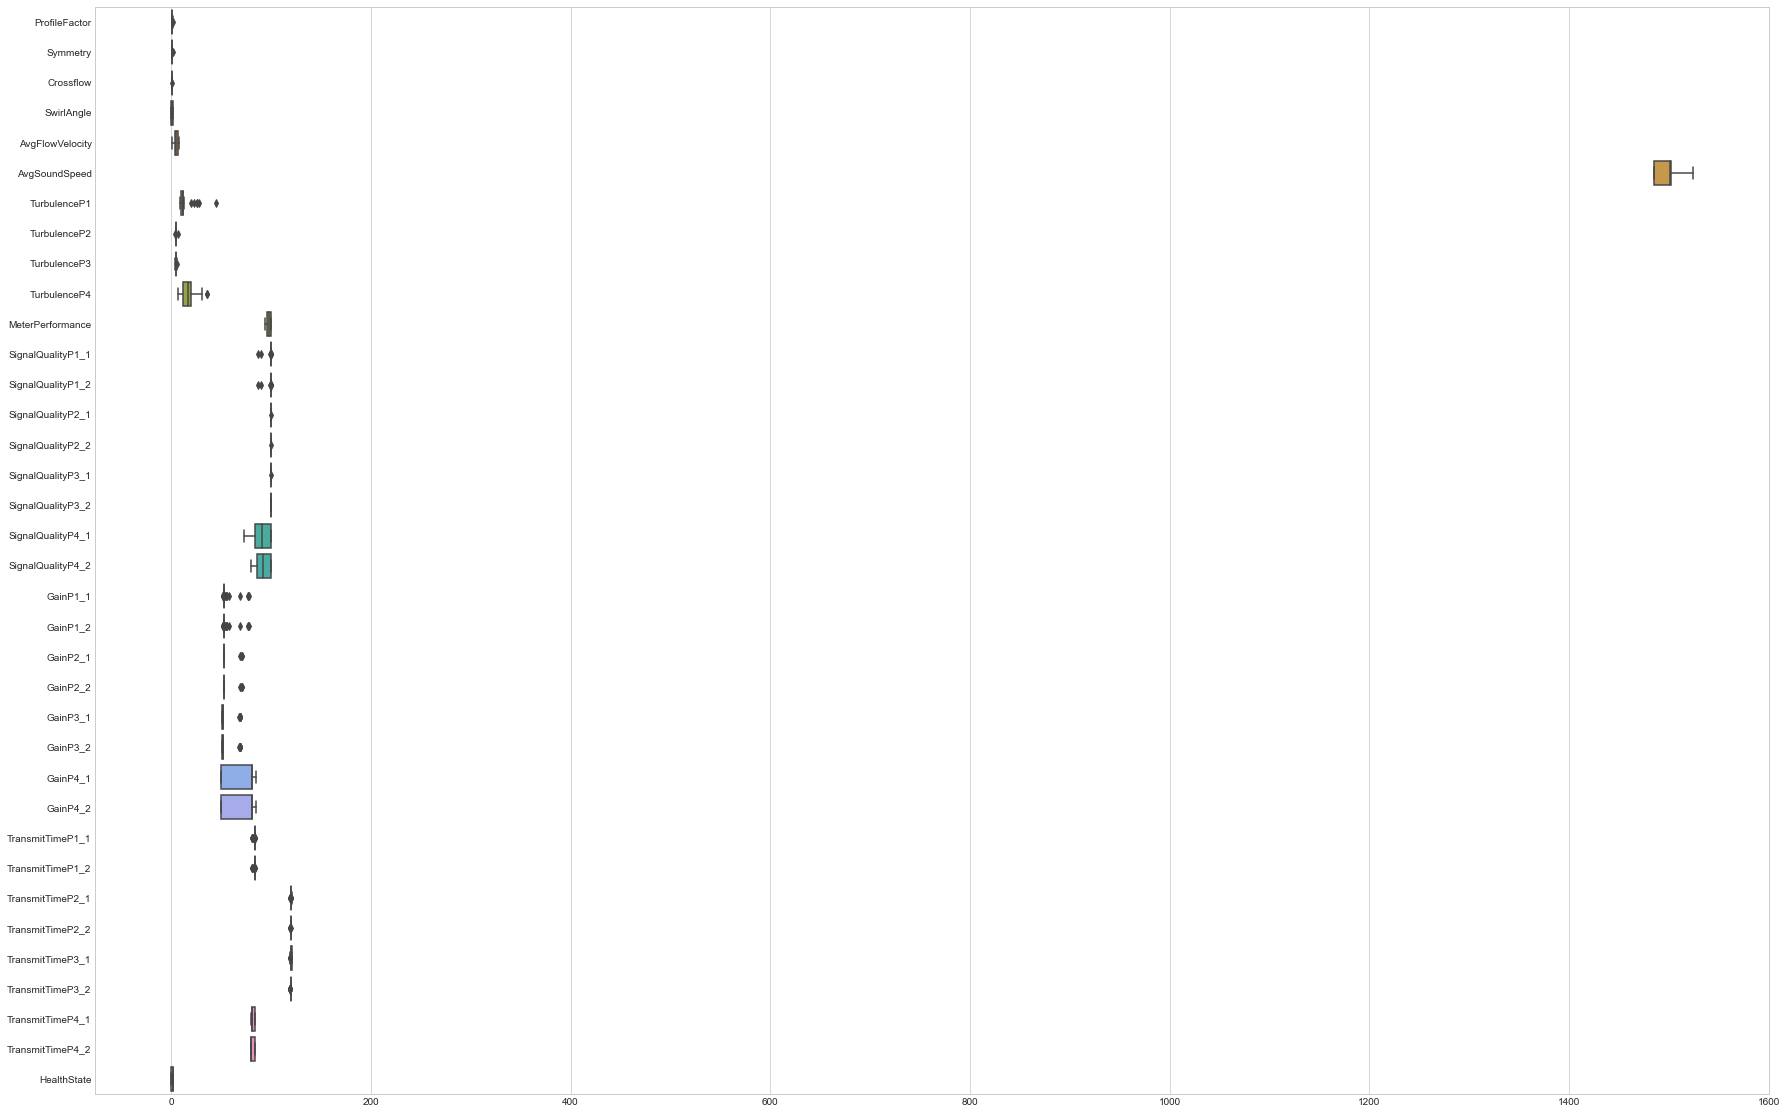

In [93]:
# See the clean data
#Summary View of all attribute , The we will look into all the boxplot individually to trace out outliers
plt.subplots(figsize=(30,20))
ax = sns.boxplot(data=cleandf, orient="h")

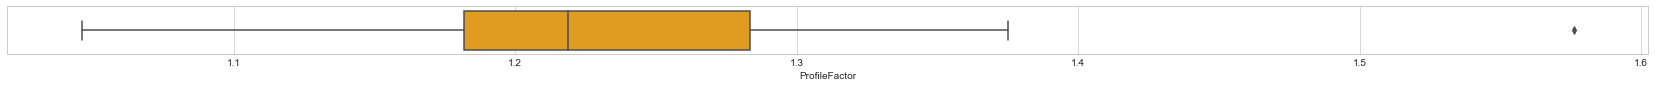

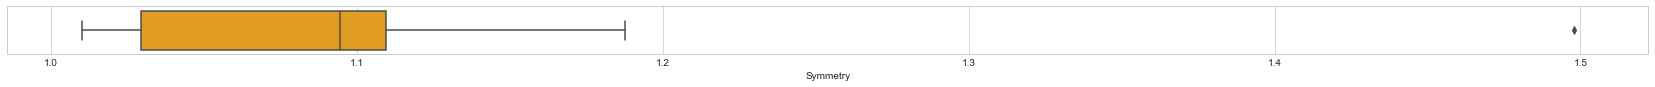

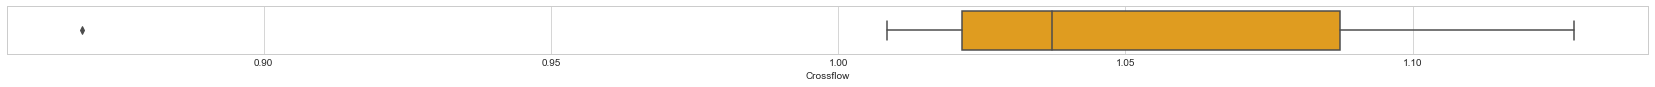

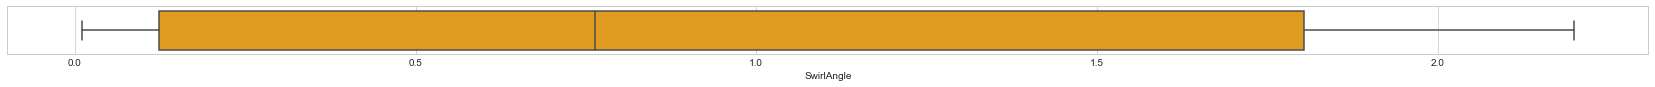

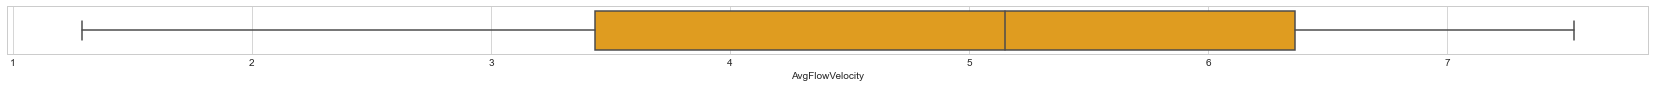

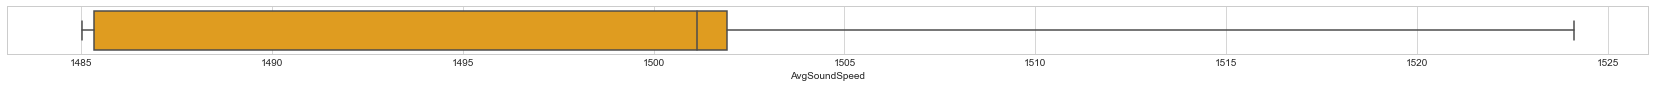

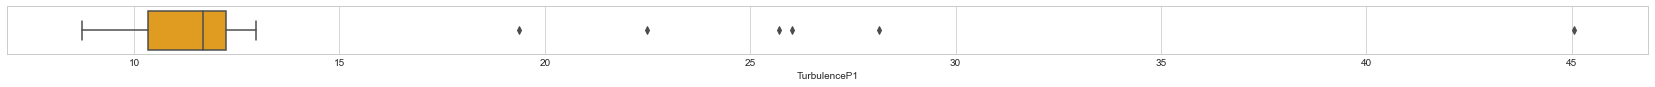

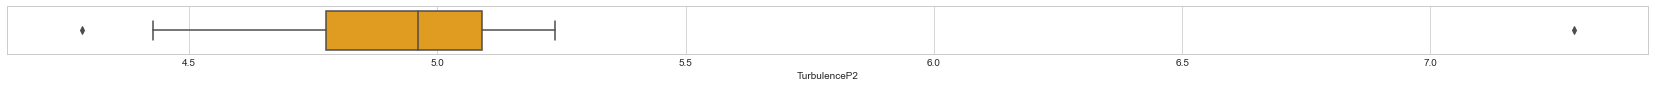

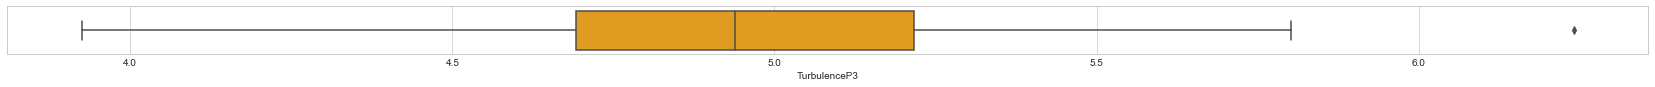

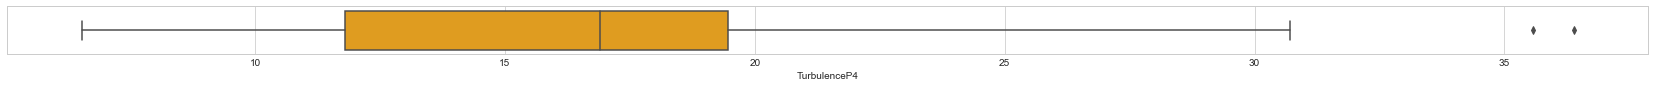

In [94]:
plt.figure(figsize= (100,3))
plt.subplot(3,3,3)
sns.boxplot(x= cleandf.ProfileFactor, color='orange')
plt.figure(figsize= (100,3))
plt.subplot(3,3,3)
sns.boxplot(x= cleandf.Symmetry, color='orange')
plt.figure(figsize= (100,3))
plt.subplot(3,3,3)
sns.boxplot(x= cleandf.Crossflow, color='orange')
plt.figure(figsize= (100,3))
plt.subplot(3,3,3)
sns.boxplot(x= cleandf.SwirlAngle, color='orange')
plt.figure(figsize= (100,3))
plt.subplot(3,3,3)
sns.boxplot(x= cleandf.AvgFlowVelocity, color='orange')
plt.figure(figsize= (100,3))
plt.subplot(3,3,3)
sns.boxplot(x= cleandf.AvgSoundSpeed, color='orange')
plt.figure(figsize= (100,3))
plt.subplot(3,3,3)
sns.boxplot(x= cleandf.TurbulenceP1, color='orange')
plt.figure(figsize= (100,3))
plt.subplot(3,3,3)
sns.boxplot(x= cleandf.TurbulenceP2, color='orange')
plt.figure(figsize= (100,3))
plt.subplot(3,3,3)
sns.boxplot(x= cleandf.TurbulenceP3, color='orange')
plt.figure(figsize= (100,3))
plt.subplot(3,3,3)
sns.boxplot(x= cleandf.TurbulenceP4, color='orange')
plt.show()

## Pearson Correlation Coefficient

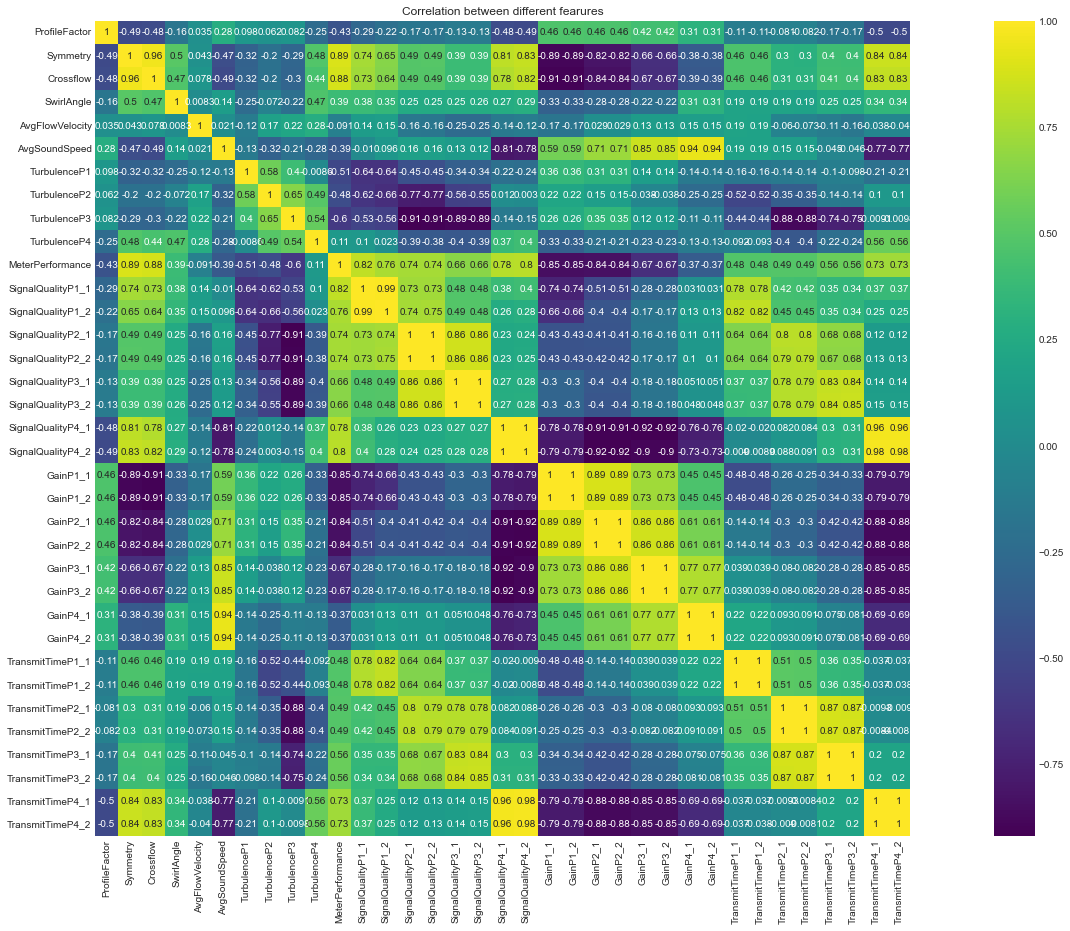

In [96]:
def correlation_heatmap(dataframe,l,w):
    #correlations = dataframe.corr()
    correlation = dataframe.corr()
    plt.figure(figsize=(l,w))
    sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
    plt.title('Correlation between different fearures')
    plt.show()
    
# Let's Drop Class column and see the correlation Matrix & Pairplot Before using this dataframe for PCA as PCA should only be perfromed on independent attribute
cleandf= newdf.drop('HealthState', axis=1)
#print("After Dropping: ", cleandf)
correlation_heatmap(cleandf, 30,15)

## Pair plot Analysis

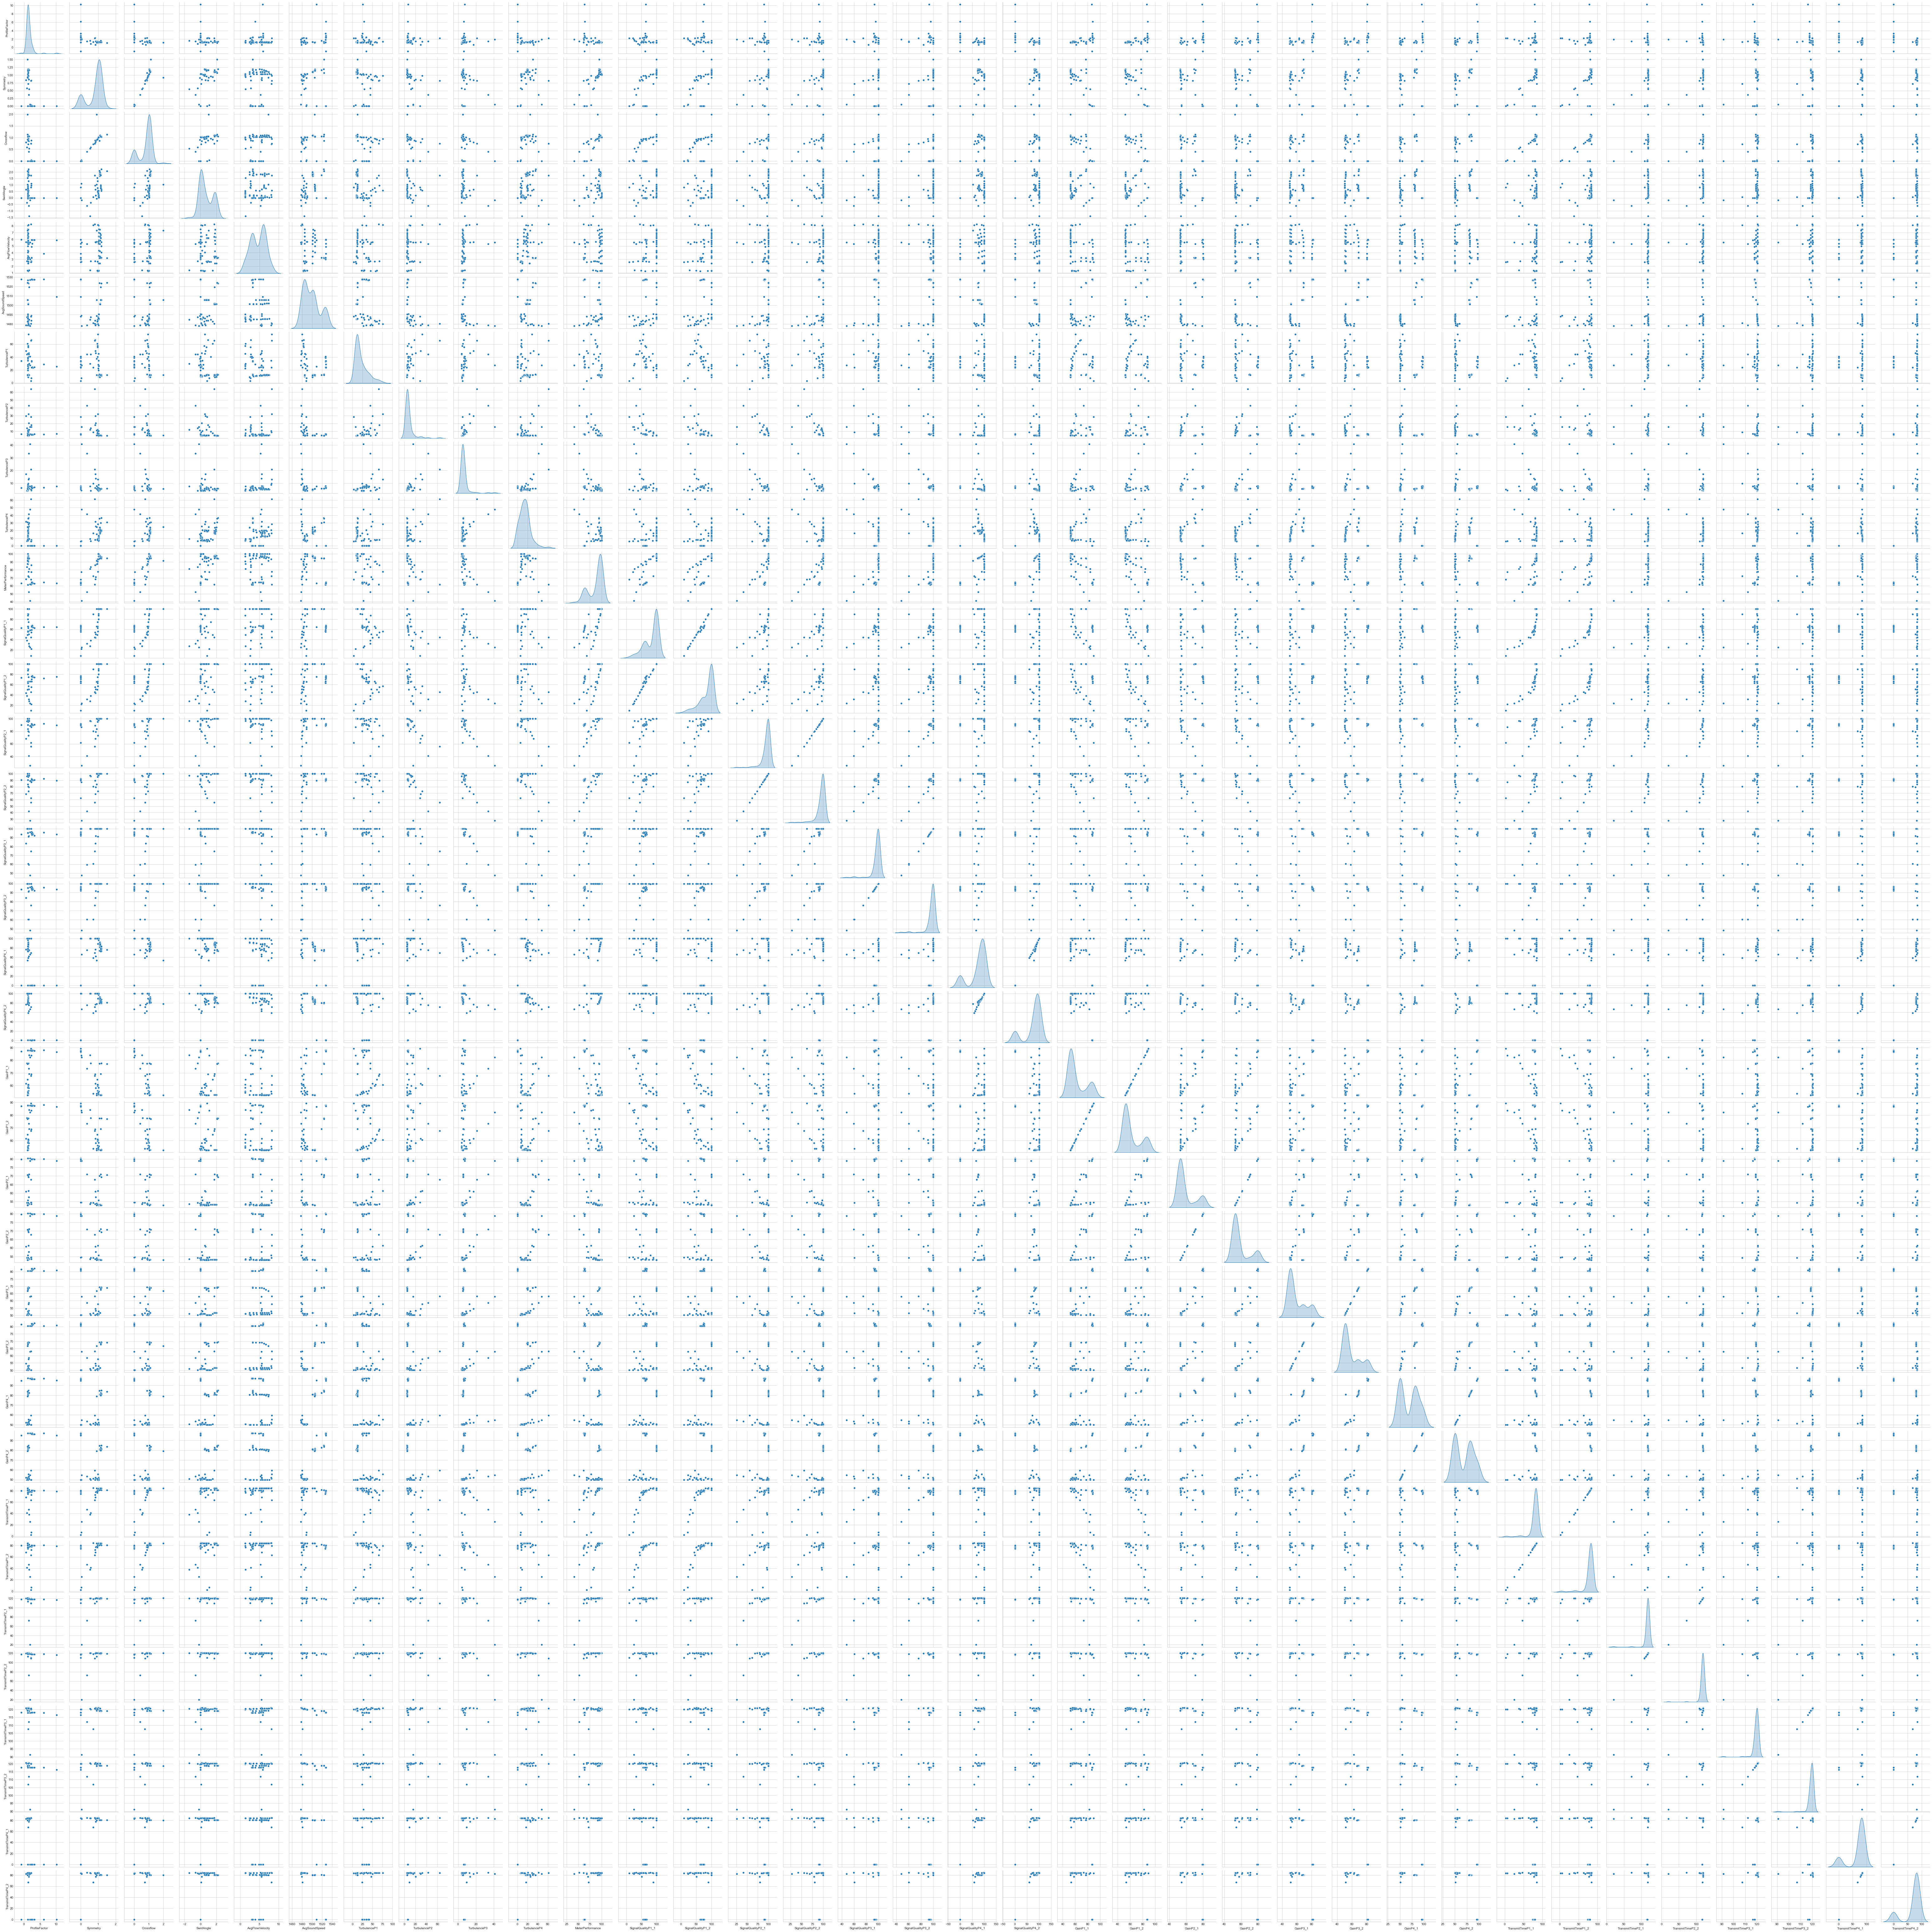

In [97]:
sns.pairplot(cleandf, diag_kind="kde")

## Principal Component Analysis(PCA):

Basically PCA is a dimension reduction methodology that aims to reduce a large set of (often correlated) variables into a smaller set of (uncorrelated) variables, called principal components, which holds sufficient information without losing the relevant info much.

Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. These combinations are done in such a way that the new variables (i.e., principal components) are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first components.

In [193]:
# Separate The Data Into Independent & Dependent attribute

#now separate the dataframe into dependent and independent variables
# X1= newdf.drop('HealthState',axis=1)
# y1 = newdf['HealthState']
# print("shape of new_vehicle_df_independent_attr::",X.shape)
# print("shape of new_vehicle_df_dependent_attr::",y.shape)
X = newdf.iloc[:,0:35].values
y = newdf.iloc[:,35].values


92

In [184]:
# Scaling The Independent Data Set

from sklearn.preprocessing import StandardScaler
# on this distribution. 
sc = StandardScaler()
X_std =  sc.fit_transform(X)

In [185]:
# Calculating the covariance matrix 35*35

cov_matrix = np.cov(X_std.T)
print("cov_matrix shape:",cov_matrix.shape)
print("Covariance_matrix",cov_matrix)

cov_matrix shape: (35, 35)
Covariance_matrix [[ 1.01098901 -0.49481201 -0.48682548 ... -0.17308418 -0.5009918
  -0.50095164]
 [-0.49481201  1.01098901  0.9665513  ...  0.40371246  0.85272869
   0.85268809]
 [-0.48682548  0.9665513   1.01098901 ...  0.40862495  0.83596242
   0.83584575]
 ...
 [-0.17308418  0.40371246  0.40862495 ...  1.01098901  0.20185658
   0.20227609]
 [-0.5009918   0.85272869  0.83596242 ...  0.20185658  1.01098901
   1.01098638]
 [-0.50095164  0.85268809  0.83584575 ...  0.20227609  1.01098638
   1.01098901]]


In [186]:
# Calculating Eigen Vectors & Eigen Values: Using NumPy linear algebra function

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-1.20359663e-01 -7.11610734e-02  4.02880879e-02 ...  4.27023131e-14
  -2.72575233e-14  2.16863802e-15]
 [ 2.29681723e-01  4.64671333e-02 -1.49891149e-01 ... -7.05022698e-15
  -3.24686581e-15  1.91073023e-15]
 [ 2.29523261e-01  4.67800898e-02 -1.41804041e-01 ... -8.53531129e-14
   3.65207521e-14 -3.58451099e-15]
 ...
 [ 1.53574914e-01 -1.54933508e-01  2.49581301e-01 ...  4.00902631e-11
  -5.55342015e-12 -1.03028518e-12]
 [ 1.98017051e-01  1.94339683e-01 -2.24011706e-02 ...  7.16311684e-12
  -9.80564058e-13 -4.00170501e-12]
 [ 1.98058071e-01  1.94212222e-01 -2.19345614e-02 ... -7.35240534e-12
   1.23187338e-12  3.94846948e-12]]

 Eigen Values 
%s [ 1.58128248e+01  9.03966291e+00  3.57913326e+00  1.84993204e+00
  1.67351480e+00  9.52937400e-01  7.40469145e-01  4.97719524e-01
  3.62193541e-01  2.88666133e-01  2.49840629e-01  1.00342841e-01
  6.49333759e-02  5.20832980e-02  4.21186666e-02  2.76591192e-02
  1.56090063e-02  1.07649274e-02  8.72235744e-03  7.18281765e-03
  

In [187]:
# Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]
# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()
print(eig_pairs)
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]
# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(15.812824780022616, array([-0.12035966,  0.22968172,  0.22952326,  0.09642141, -0.01487907,
       -0.12865817, -0.1021496 , -0.08746452, -0.14130647,  0.03803795,
        0.24689746,  0.18749495,  0.16824354,  0.16992861,  0.1704299 ,
        0.1557109 ,  0.15615953,  0.21090691,  0.21348836, -0.22678735,
       -0.22678735, -0.23030783, -0.23030783, -0.19144747, -0.19144747,
       -0.11680447, -0.11680447,  0.110712  ,  0.11073569,  0.12979118,
        0.12998104,  0.1538004 ,  0.15357491,  0.19801705,  0.19805807])), (9.039662910614155, array([-0.07116107,  0.04646713,  0.04678009, -0.03561785,  0.01460102,
       -0.25309108,  0.08359063,  0.20855777,  0.24123505,  0.193564  ,
       -0.03151699, -0.12149993, -0.15558489, -0.23214904, -0.2308213 ,
       -0.20766693, -0.20609445,  0.17027247,  0.16626238, -0.06436748,
       -0.06436748, -0.09935227, -0.09935227, -0.17492904, -0.17492904,
       -0.22616594, -0.22616594, -0.1892599 , -0.18952961, -0.22667025,
       -0.22656891,

In [188]:
# Calculating variance explained in percentage

tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 35 entries as there are 18 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 35 entries with 35 th entry 
# cumulative reaching almost 100%

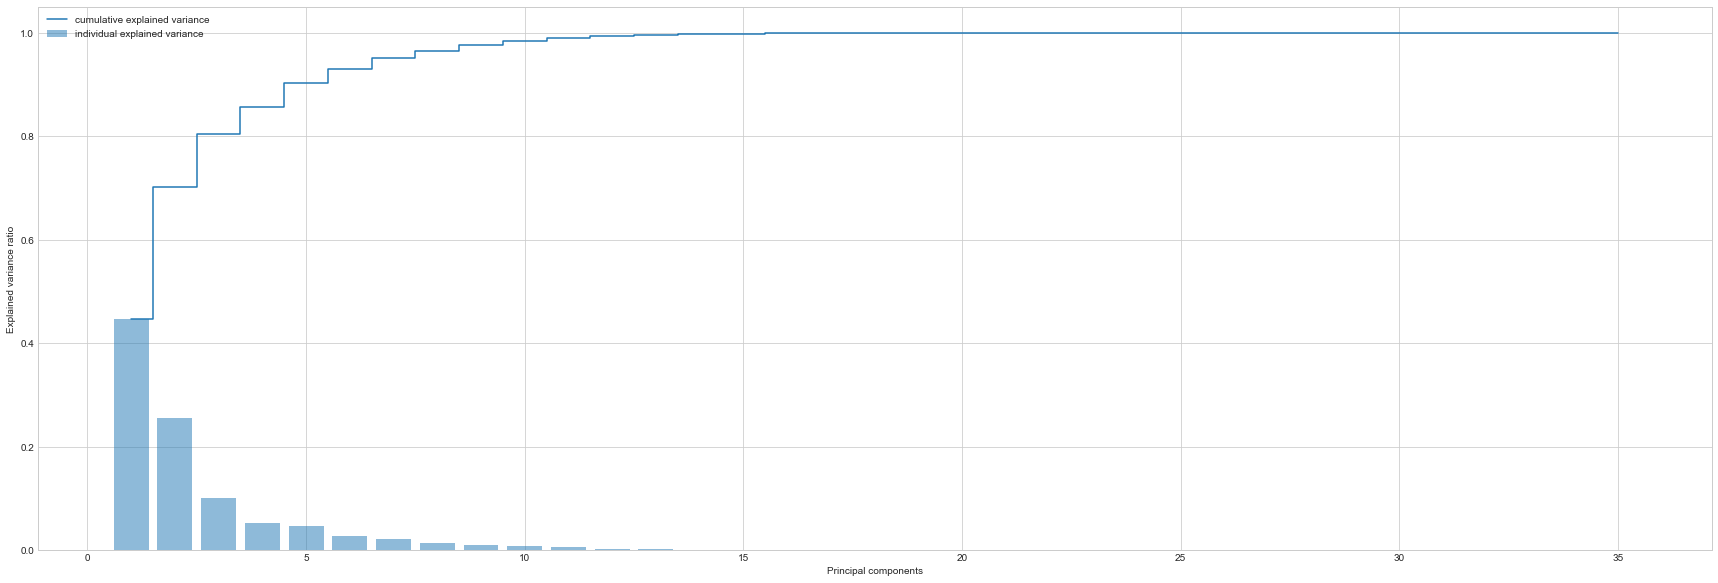

In [192]:
# Plotting The Explained Variance and Principal Components

plt.figure(figsize= (30,10))
plt.bar(range(1,36), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,36),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

## Observation

- From above figure, we can clealy see that 16 dimensions are able to explain 100% variance of data.
- 13 dimensions are able to get >95% variance. 
- Hence, to achieve 100% accuracy, we will use 16 principal components first.

In [225]:
# Dimensionality Reduction

# P_reduce represents reduced mathematical space....
P_reduce = np.array(eigvectors_sorted[0:7])   # Reducing from 8 to 4 dimension space
X_std_7D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions
reduced_pca = pd.DataFrame(X_std_7D)  # converting array to dataframe for pairplot
reduced_pca

0         1         2         3         4         5         6
0   3.031601  0.415359  0.706446  1.574097 -0.150754 -0.451953 -0.178296
1   3.044418  0.413008  0.688240  1.542833 -0.124762 -0.462249 -0.202376
2   3.015574  0.455606  0.549970  1.467666 -0.376698 -0.061083 -0.011335
3   3.012795  0.481394  0.519413  1.414609 -0.367471 -0.068293 -0.020255
4   3.004467  0.457885  0.560618  1.519848 -0.400402 -0.048751  0.008009
..       ...       ...       ...       ...       ...       ...       ...
87 -6.934282 -3.938272 -0.069502  0.378477 -0.546322  0.427683  0.546133
88 -7.138841 -3.875382 -0.012007  0.332480 -0.602763  0.701636 -0.120130
89 -6.879903 -4.018693 -0.066515  0.401004 -0.517221  0.489170  0.399161
90 -6.839494 -4.031486 -0.020719  0.386391 -0.474623  0.406751  0.609865
91 -6.655228 -3.582894  0.053221  0.094386 -0.769457 -0.826287  3.049370

[92 rows x 7 columns]

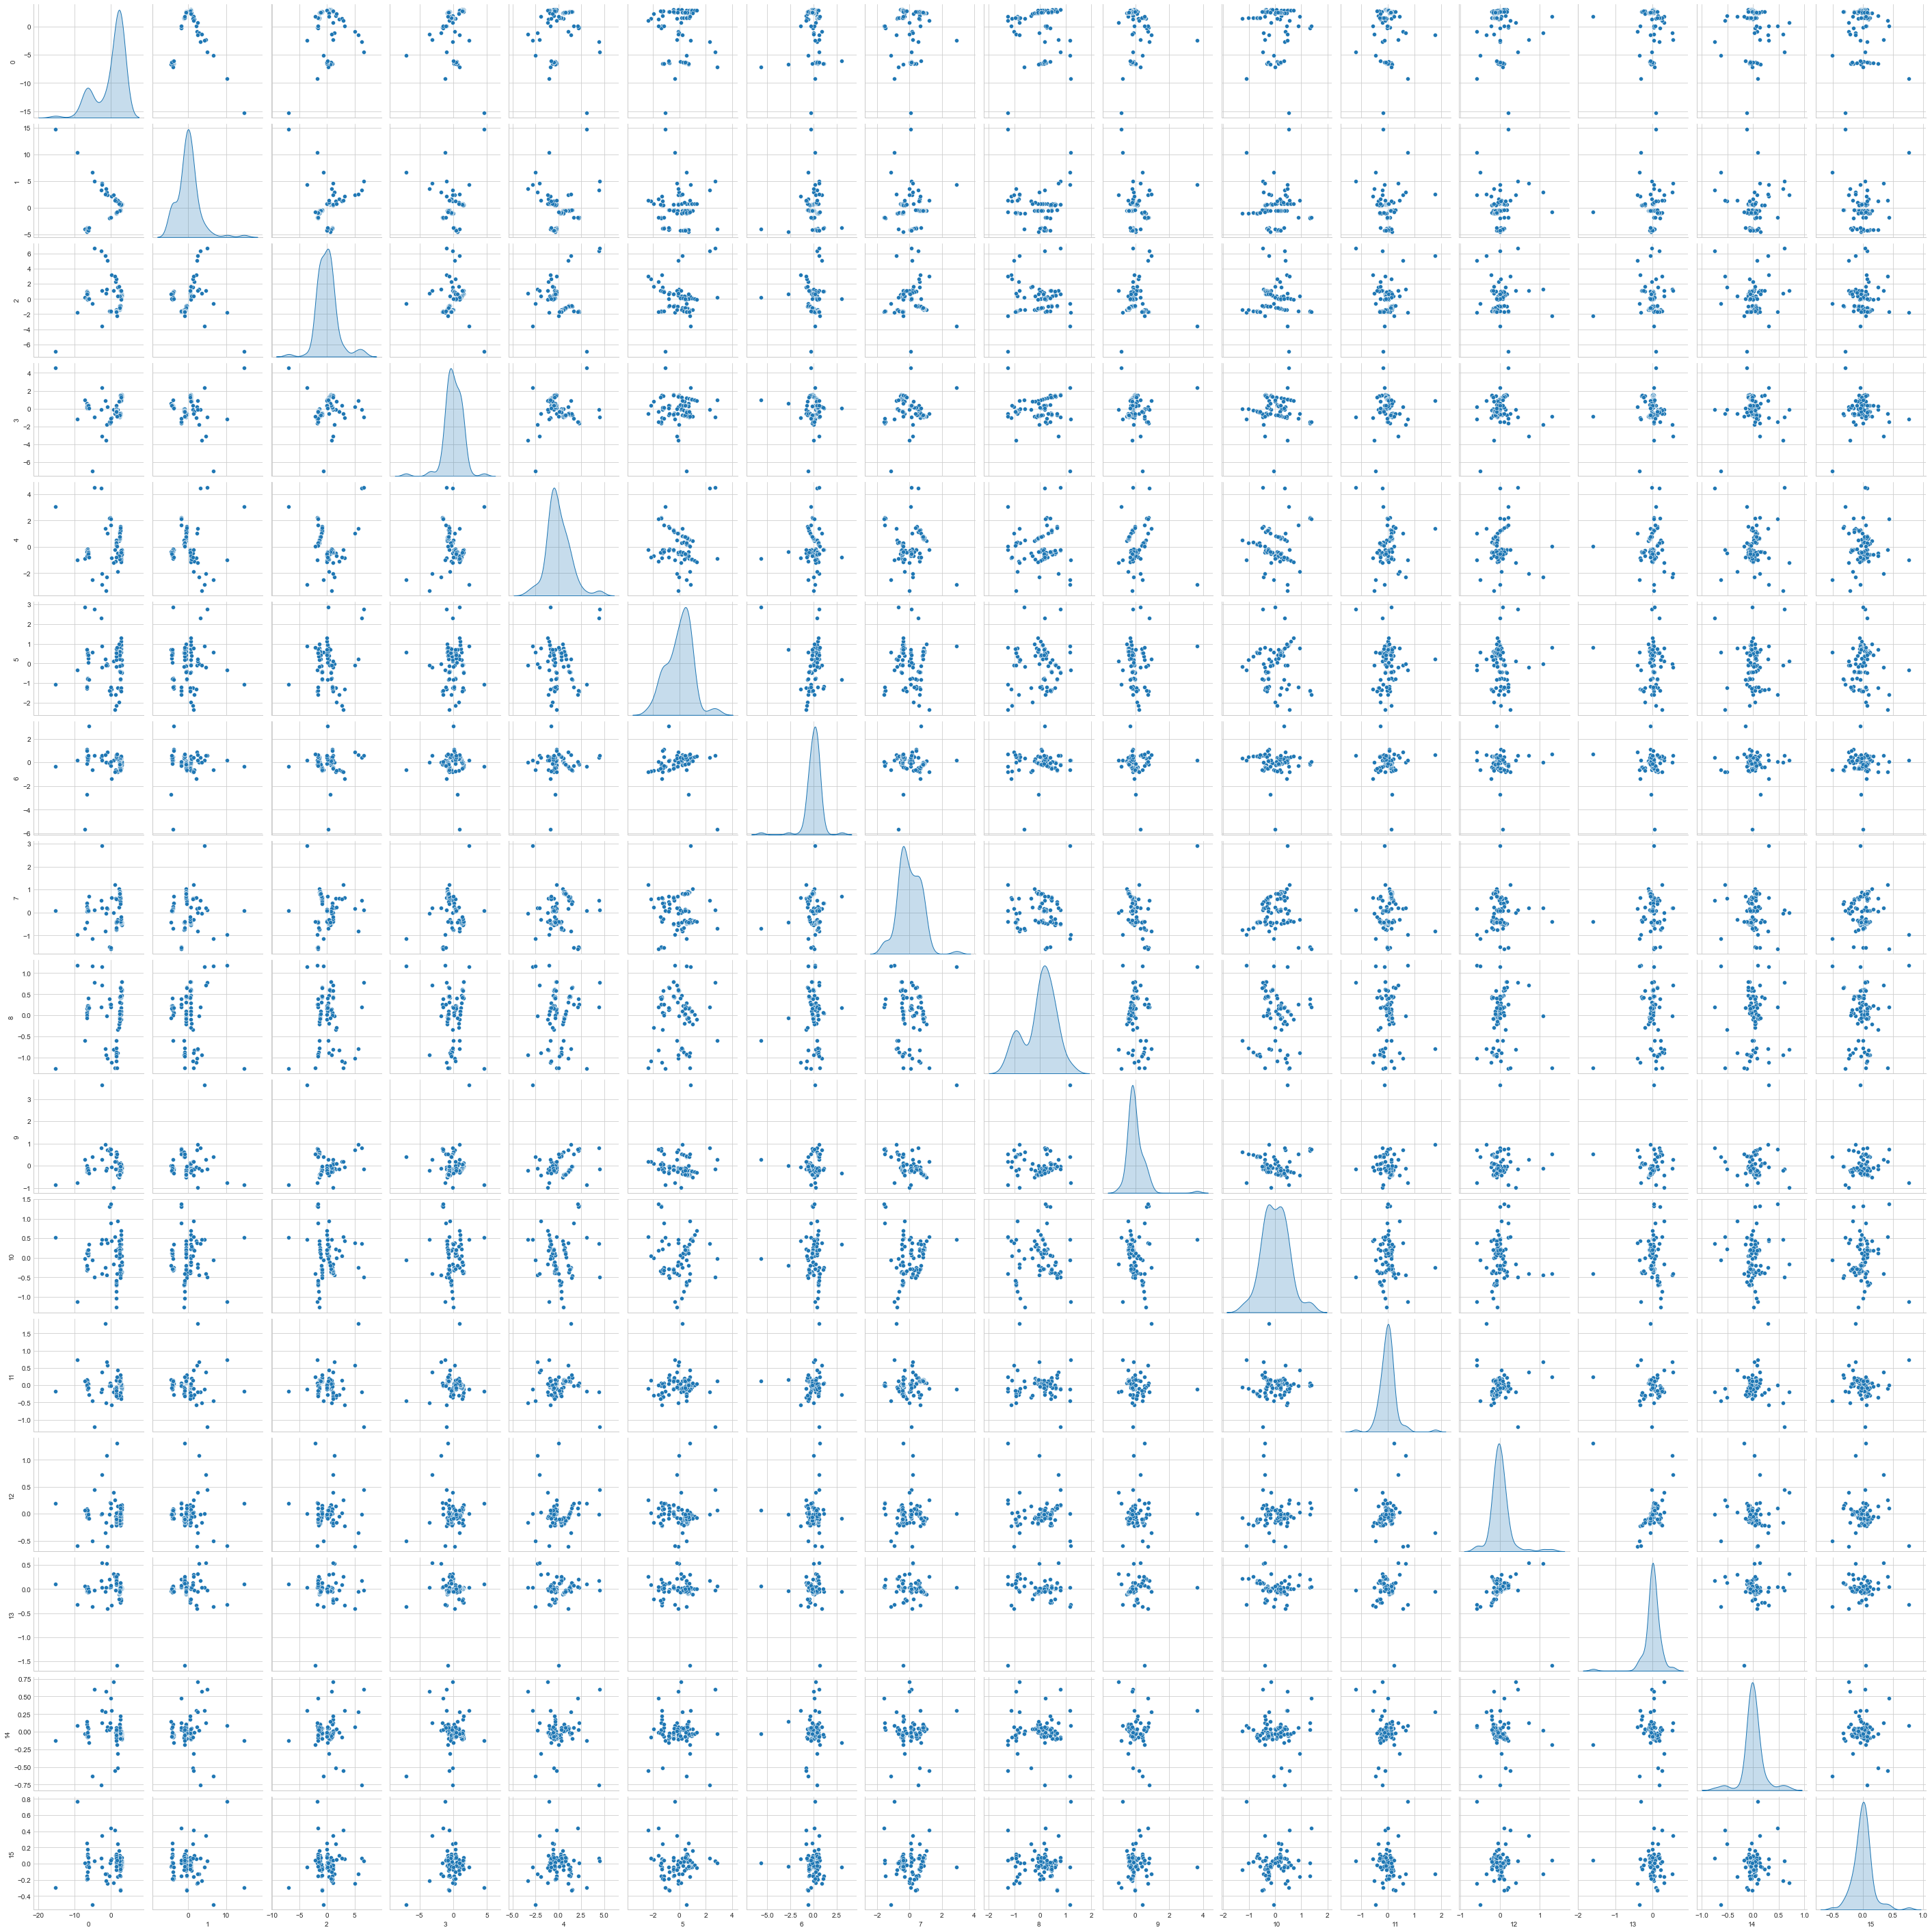

In [165]:
# check The Pairplot Of Reduced Dimension After PCA

sns.pairplot(reduced_pca, diag_kind='kde') 

## Observation
After dimension reduction using PCA, I have no idea wth is going on about this pairgrid, it looks the same as the previous one, with data looking very scattered.

But I definitely know that it will be 100% accurate, cuz i choose 16 instead of 13 dimension

But after testing one by one, i can actually use 7dimension instead, wth?

## Fit Support Vector Classifier Model(SVC) On Train-test Data

Compare two SVC model with 35 original independent variables VS with the 16 new reduced featuer constructed using PCA.


In [228]:
#split the data into 80:20 ratio , cuz i tested 70:30 ratio and it is not as accurate as the 80:20 ratio

#orginal Data
Orig_X_train,Orig_X_test,Orig_y_train,Orig_y_test = train_test_split(X_std, y, test_size=0.20, random_state=1)

#PCA Data
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(reduced_pca, y, test_size=0.20, random_state=1)

In [231]:
## Fitting SVC model On Original Data

svc = SVC() #instantiate the object
#fit the model on orighinal raw data
svc.fit(Orig_X_train,Orig_y_train)

#predict the y value
Orig_y_predict = svc.predict(Orig_X_test)


## Fitting SVC ON PCA Data

#now fit the model on pca data with new dimension
svc1 = SVC() #instantiate the object
svc1.fit(pca_X_train,pca_y_train)
#predict the y value
pca_y_predict = svc1.predict(pca_X_test)


#display accuracy score of both models
print("Model Score On Original Data ",svc.score(Orig_X_test, Orig_y_test))
print("Model Score On Reduced PCA Dimension ",svc1.score(pca_X_test, pca_y_test))
print("Before PCA On Original 35 Dimension",accuracy_score(Orig_y_test,Orig_y_predict))
print("After PCA(On 7 dimension)",accuracy_score(pca_y_test,pca_y_predict))

Model Score On Original Data  0.8947368421052632
Model Score On Reduced PCA Dimension  0.8947368421052632
Before PCA On Original 35 Dimension 0.8947368421052632
After PCA(On 7 dimension) 0.8947368421052632


## WHUT?! Should't it be like 100% accurate? meaning SVC is not good to train and test, but at least the original vs reduced dimension data is same

## Confusion Matrix

Confusion Matrix For : 
 Original Data Set [[ 2  0  0]
 [ 2  3  0]
 [ 0  0 12]]


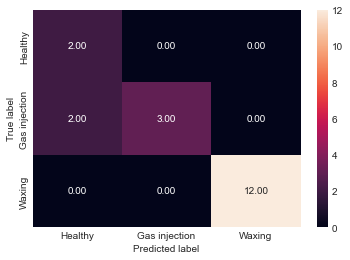

Confusion Matrix For : 
 For Reduced Dimensions Using PCA  [[ 2  0  0]
 [ 2  3  0]
 [ 0  0 12]]


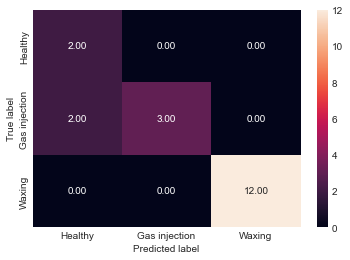

Classification Report For Raw Data: 
               precision    recall  f1-score   support

         0.0       0.50      1.00      0.67         2
         1.0       1.00      0.60      0.75         5
         2.0       1.00      1.00      1.00        12

    accuracy                           0.89        19
   macro avg       0.83      0.87      0.81        19
weighted avg       0.95      0.89      0.90        19

Classification Report For PCA: 
               precision    recall  f1-score   support

         0.0       0.50      1.00      0.67         2
         1.0       1.00      0.60      0.75         5
         2.0       1.00      1.00      1.00        12

    accuracy                           0.89        19
   macro avg       0.83      0.87      0.81        19
weighted avg       0.95      0.89      0.90        19



In [232]:
# Calculate Confusion Matrix & PLot To Visualize it
def draw_confmatrix(y_test, yhat, str1, str2, str3, datatype ):
    #Make predictions and evalute
    #model_pred = fit_test_model(model,X_train, y_train, X_test)
    # cm = confusion_matrix(y_test, yhat, [0,1,2])
    cm = confusion_matrix(y_test, yhat)


    # y_true, y_pred, *, labels=None, sample_weight=None, normalize=None
    print("Confusion Matrix For :", "\n",datatype,cm )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [str1, str2,str3] , yticklabels = [str1, str2,str3] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()



draw_confmatrix(Orig_y_test, Orig_y_predict,"Healthy", "Gas injection", "Waxing", "Original Data Set" )
draw_confmatrix(pca_y_test, pca_y_predict,"Healthy", "Gas injection", "Waxing", "For Reduced Dimensions Using PCA ")


#Classification Report Of Model built on Raw Data
print("Classification Report For Raw Data:", "\n", classification_report(Orig_y_test,Orig_y_predict))

#Classification Report Of Model built on Principal Components:
print("Classification Report For PCA:","\n", classification_report(pca_y_test,pca_y_predict))


## I have no idea what is going on above, why there is only 19 data. My conclusion is that SVC is bad, or i did something wrong